In [1]:
import subprocess
import shlex

In [2]:
# Cell 2: Converting the shell command to a python method- runAlgorithm


# import subprocess
# import shlex


def runAlgorithm(**kwargs):
    
    # Default arguments of the method:
    default_args = {'type': 'gen', 'graph': "flower 1000 1 2", 'method': 'sketch', 'alpha': '1', 'least_coverage': '1',
           'sketch_k': '128', 'multipass': '10000', 'rad_min': '1', 'rad_max': '30', 'random_seed': '114514'}
    
    options = ""
    
    for key in kwargs:
        default_args[key] = kwargs[key]
        
    if default_args['type'] == 'gen':
        a = default_args['graph']
        default_args['graph'] = f'"{a}"'
            
    for key in default_args:
        options += f" -{key}={default_args[key]}"
        
    subprocess.run(shlex.split(f"./bin/box_cover {options}"), cwd='./graph_sketch_fractality')

In [15]:
import graph_tool.all as gt
import csv
import traceback
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [4]:
netscience_graph = gt.collection.ns["facebook_organizations/L1"]

In [5]:
if "weight" not in netscience_graph.edge_properties:
    netscience_graph.edge_properties["weight"] = netscience_graph.new_edge_property("int", val=-1)
else:
    netscience_graph.ep.weight.a *= -1

netscience_graph.ep.weight[netscience_graph.edges().next()]

-1

In [6]:
max_span_tree = gt.min_spanning_tree(netscience_graph, netscience_graph.ep.weight)
mst_graph = gt.GraphView(netscience_graph, efilt=max_span_tree)

In [7]:
def saveTSV(filePath, graph):
    with open(filePath, "w", newline="") as tsvfile:
        writer = csv.writer(tsvfile, delimiter="\t")
        # Write header row
        # writer.writerow(["source", "target", "source_name", "target_name", "edge_weight"])

        for e in graph.edges():
            source = e.source()
            target = e.target()
            # source_name = graph.vertex_properties["name"][source]
            # target_name = graph.vertex_properties["name"][target]
            # edge_weight = graph.edge_properties["weight"][e]
            writer.writerow([source, target
                            #  , source_name, target_name, edge_weight
                             ])

In [8]:
saveTSV(filePath='./fb_org_L1.tsv', graph=netscience_graph)

In [9]:
runAlgorithm(type = 'tsv',graph = "../fb_org_L1.tsv")

[0212 02:10:19] JLOG: box_cover.9f89a6ef4075.jlog.250212-021019.10559
[0212 02:10:19] run.program = box_cover
[0212 02:10:19] run.args = ./bin/box_cover
[0212 02:10:19] run.args = -type=tsv
[0212 02:10:19] run.args = -graph=../fb_org_L1.tsv
[0212 02:10:19] run.args = -method=sketch
[0212 02:10:19] run.args = -alpha=1
[0212 02:10:19] run.args = -least_coverage=1
[0212 02:10:19] run.args = -sketch_k=128
[0212 02:10:19] run.args = -multipass=10000
[0212 02:10:19] run.args = -rad_min=1
[0212 02:10:19] run.args = -rad_max=30
[0212 02:10:19] run.args = -random_seed=114514
[0212 02:10:19] run.machine = 9f89a6ef4075
[0212 02:10:19] run.date = 2025/02/12 02:10:19
[0212 02:10:19] run.user = =========
  Vertices: 5793
  Edges: 61506
  Type: agl::basic_graph<int>
----------
  0 -> 1, 62
  1 -> 0
  2 -> 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...
  3 -> 2, 8, 24, 27, 28, 33, 42, 52, 55, 668, ...
  4 -> 2, 19, 26, 31, 41, 50, 1190, 1485, 1820, 1836, ...
  ...
----------
  0 <- 1, 62
  1 <- 0
  2 <- 3, 4, 5

In [10]:
import datetime
endDate = datetime.datetime.now()

In [12]:
endDate

datetime.datetime(2025, 2, 12, 2, 10, 40, 61914)

In [11]:

import glob
import os
import json


list_of_files = glob.glob('./graph_sketch_fractality/jlog/*')
latest_file = max(list_of_files, key=os.path.getctime)

f = open(latest_file, "r").read()
json_file = json.loads(f)

radius = json_file['radius']
size = json_file['size']

print (f"radius: \n{radius}\n")
print (f"size: \n{size}")
print(json_file)

radius: 
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

size: 
[613, 138, 51, 21, 8, 5, 2, 2, 2, 2, 1]
{'run': {'program': 'box_cover', 'args': ['./bin/box_cover', '-type=tsv', '-graph=../fb_org_L1.tsv', '-method=sketch', '-alpha=1', '-least_coverage=1', '-sketch_k=128', '-multipass=10000', '-rad_min=1', '-rad_max=30', '-random_seed=114514'], 'machine': '9f89a6ef4075', 'date': '2025/02/12', 'user': '', 'pid': 10559, 'time': 19.8419, 'memory': 53895168}, 'graph_info': [{'vertices': 5793, 'edges': 61506, 'graph': '../fb_org_L1.tsv'}], 'name': 'sketch-k.128', 'k': '128', 'pass': '10000', 'alpha': '1.000000', 'time': [0.0194449, 0.667861, 1.25558, 1.61613, 1.86304, 2.05107, 2.22884, 2.436, 2.54329, 2.57509, 2.53321], 'size': [613, 138, 51, 21, 8, 5, 2, 2, 2, 2, 1], 'radius': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'coverage': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'centers': [{'1': [184, 988, 1444, 3538, 552, 143, 1699, 3402, 1485, 1816, 214, 1411, 2957, 3728, 5384, 1264, 27, 1661, 524, 410, 119, 3276, 330

In [13]:
box_sizes = [2 * rb + 1 for rb in radius]

In [16]:
x = np.array(box_sizes)
y = np.array(size)
x_log = np.log10(box_sizes)
y_log = np.log10(size)

In [17]:
fit_pl = linregress(x_log, y_log)
fit_exp = linregress(x, y_log)

In [18]:
y_log_pl = fit_pl.slope * x_log + fit_pl.intercept
y_log_exp = fit_exp.slope * x + fit_exp.intercept

In [19]:
x_plot = np.linspace(x.min(), x.max(), 100) # 
x_log_plot = np.log10(x_plot) # 
y_log_exp_plot = fit_exp.slope * x_plot + fit_exp.intercept

In [20]:
#marker='o', markersize=10, color=color, markerfacecolor=color_pale, markeredgewidth=linewidth, markeredgecolor=color, linewidth=linewidth

def set_plotting_style():
    plt.rcParams['lines.linewidth'] = 2
    plt.rcParams['lines.markeredgewidth'] = 2
    plt.rcParams['lines.markersize'] = 10
    plt.rcParams['axes.linewidth'] = 2
    plt.rcParams['font.size'] = 20
    plt.rcParams['legend.fontsize'] = 20 * 0.6
    plt.rcParams['figure.subplot.left'] = 0.25
    plt.rcParams['figure.subplot.right'] = 0.95
    plt.rcParams['figure.subplot.bottom'] = 0.2
    plt.rcParams['figure.subplot.top'] = 0.9
    plt.rcParams['xtick.bottom'] = True
    plt.rcParams['xtick.top'] = True
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['xtick.minor.size'] = 4
    plt.rcParams['xtick.minor.width'] = 2
    plt.rcParams['xtick.major.size'] = 8
    plt.rcParams['xtick.major.width'] = 2
    plt.rcParams['ytick.left'] = True
    plt.rcParams['ytick.right'] = True
    plt.rcParams['ytick.direction'] = 'in'
    plt.rcParams['ytick.minor.size'] = 4
    plt.rcParams['ytick.minor.width'] = 2
    plt.rcParams['ytick.major.size'] = 8
    plt.rcParams['ytick.major.width'] = 2

In [21]:
set_plotting_style()

#plt.rcParams['font.size'] = 18
#plt.rcParams['lines.linewidth'] = 2
#plt.rcParams['axes.linewidth'] = 2

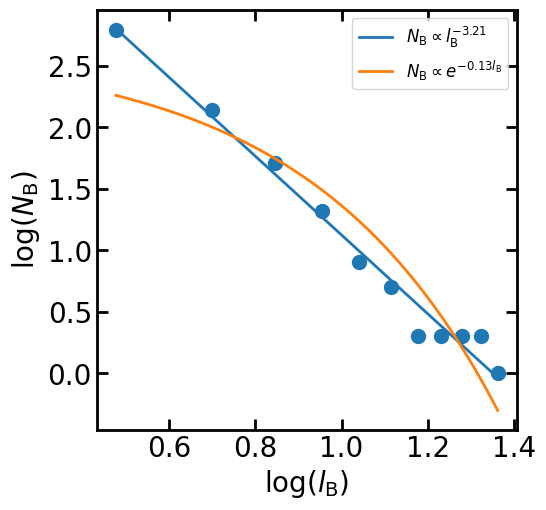

In [22]:
fig = plt.figure(figsize=(6, 6))
plt.scatter(x_log, y_log)
plt.plot(x_log, y_log_pl, label='$N_\mathrm{B}\propto l_\mathrm{B}^{%.2f}$' %fit_pl.slope)
plt.plot(x_log_plot, y_log_exp_plot, label='$N_\mathrm{B}\propto e^{%.2f l_\mathrm{B}}$' %fit_exp.slope)
plt.xlabel('$\log(l_\mathrm{B})$')
plt.ylabel('$\log(N_\mathrm{B})$')
plt.legend()

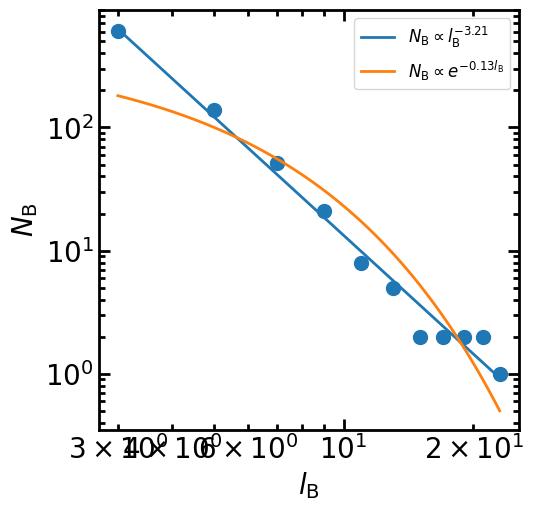

In [23]:
fig = plt.figure(figsize=(6, 6))
plt.scatter(x, y)
plt.plot(x, 10**y_log_pl, label='$N_\mathrm{B}\propto l_\mathrm{B}^{%.2f}$' %fit_pl.slope)
plt.plot(x_plot, 10**y_log_exp_plot, label='$N_\mathrm{B}\propto e^{%.2f l_\mathrm{B}}$' %fit_exp.slope)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$l_\mathrm{B}$')
plt.ylabel('$N_\mathrm{B}$')
plt.legend()
plt.show()

In [24]:
def wmse(y_fit, x=x_log, y=y_log, w=size):
    return sum(w * (y_fit - y) ** 2) / sum(w) / len(y_fit)

In [25]:
wmse_pl = wmse(y_fit=y_log_pl)
wmse_pl

0.0001316263281369934

In [26]:
wmse_exp = wmse(y_fit=y_log_exp)
wmse_exp

0.019035042574145608

In [27]:
wmse_pl / wmse_exp

0.006914947924297012